In [1]:
import pandas
df = pandas.read_excel('AmesHousing.xls')
df.head()

len(df)


2930

In [2]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn

df.plot(kind = 'scatter', x='Gr Liv Area', y='SalePrice')

### deal with the null rows


In [3]:

df1 = df.drop(['Fireplace Qu','Pool QC','Fence','Misc Feature','Alley'], 1)
# print(df1.isnull().sum().to_string())
df1["Lot Frontage"] = df1.groupby("PID").transform(lambda x: x.fillna(x.mean()))
print(df1.isnull().sum().to_string())




Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage         0
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Heating              0
Heating QC           0
Central Air          0
Electrical           1
1st Flr SF 

In [4]:

df1 = df1.dropna()
print(len(df1))
print(df1.isnull().sum().to_string())

2678
Order              0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Ful

# Groupby Neighborhood using mean()

In [5]:
df1.groupby('Neighborhood')['SalePrice'].mean()
print(df1.isnull().sum().to_string())

Order              0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bat

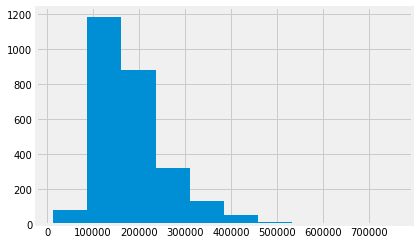

In [6]:
import numpy as np
df1['Skewed_SP'] = np.log(df1['SalePrice']+1)
plt.hist(df1.SalePrice)
plt.show()

/home/laqin/Work/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


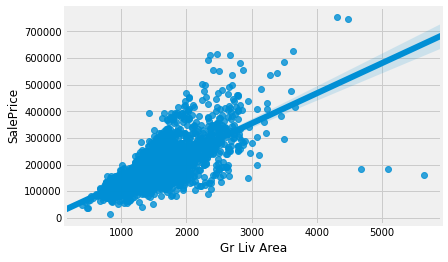

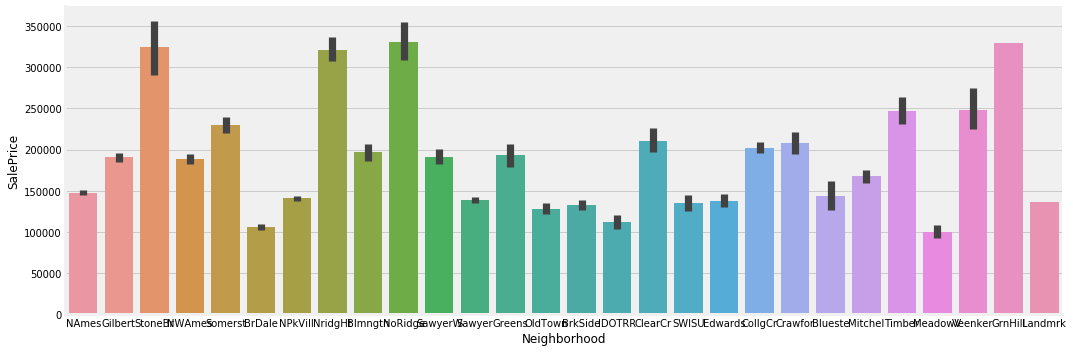

In [7]:

seaborn.regplot(x='Gr Liv Area',y='SalePrice',data=df1)

g = seaborn.factorplot(x='Neighborhood', y='SalePrice', data=df1, kind='bar', aspect=3)

### Address the problem how to collect appropriate features(cotrrelation)

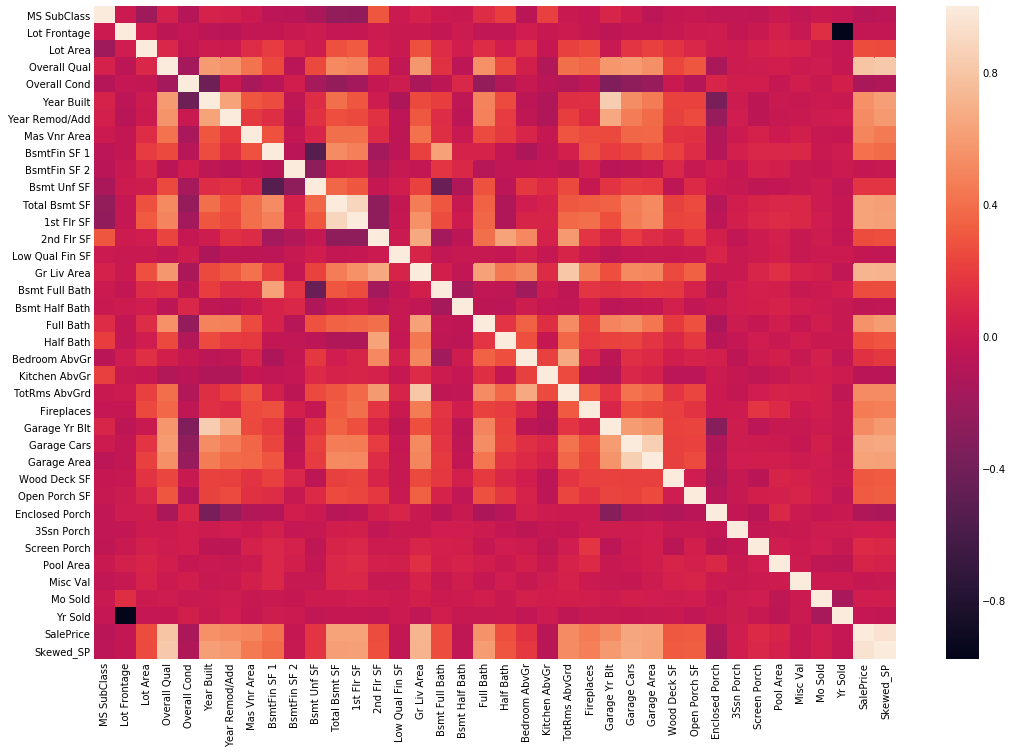

In [8]:
# features= df1[['MS SubClass','MS Zoning','Lot Frontage','Lot Area','Street','Lot Shape','SalePrice']]
features = df1.drop(['PID', 'Order'], axis = 1)

core = features.corr()
plt.figure(figsize = (16,12))
seaborn.heatmap(core, 
            xticklabels=core.columns.values,
            yticklabels=core.columns.values)

### Overall Qual, Lot Area, Yeal Built, Year Remod/Add, Mas Vnr Area, Bsmt Unf SF, Bsmtfin SF 1, Total Bsmt SF, 1st Flr SF, Gr Liv Area, Full Bath, Garage Area, Garage Cars, TotRms AbvGrd, Fireplaces, Garage Yr Blt 

In [9]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

df1.var()


Order              7.166304e+05
PID                3.550149e+16
MS SubClass        1.730532e+03
Lot Frontage       7.166304e+05
Lot Area           6.520642e+07
Overall Qual       1.831089e+00
Overall Cond       1.142782e+00
Year Built         8.723656e+02
Year Remod/Add     4.198309e+02
Mas Vnr Area       3.380636e+04
BsmtFin SF 1       2.092261e+05
BsmtFin SF 2       3.075350e+04
Bsmt Unf SF        1.899676e+05
Total Bsmt SF      1.667203e+05
1st Flr SF         1.526067e+05
2nd Flr SF         1.859629e+05
Low Qual Fin SF    1.790285e+03
Gr Liv Area        2.519998e+05
Bsmt Full Bath     2.722057e-01
Bsmt Half Bath     6.096689e-02
Full Bath          3.019850e-01
Half Bath          2.537055e-01
Bedroom AbvGr      6.234789e-01
Kitchen AbvGr      2.872602e-02
TotRms AbvGrd      2.358884e+00
Fireplaces         4.232744e-01
Garage Yr Blt      6.343729e+02
Garage Cars        4.264971e-01
Garage Area        3.574700e+04
Wood Deck SF       1.656537e+04
Open Porch SF      4.340603e+03
Enclosed

In [10]:
df2 = pandas.get_dummies(df1, columns=['Neighborhood'])
df3 = pandas.get_dummies(df2, columns=['Street'])

df3.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       ...
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Street_Grvl',
       'Street_Pave'],
      dtype='object', length=106)

# Build linear model

In [11]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor,SGDClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, ShuffleSplit, KFold
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

y = df3.SalePrice
X = df3[ [ 'Overall Qual', 'Overall Cond', 'Year Built', 'TotRms AbvGrd', 'Bedroom AbvGr', 'Garage Cars', 'Yr Sold']]

# 'Neighborhood', 'Sale Condition'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

models = [LinearRegression(), Ridge(), DecisionTreeRegressor(), Lasso(), ElasticNet(), SGDRegressor( max_iter=10)]
# models = [SGDRegressor( max_iter=10)]
for model in models:
    v = ShuffleSplit(n_splits=100, test_size=0.1)
    scores = cross_val_score(model, X_train, y_train, cv = v)
    print('average score:', sum(scores)/len(scores))



/home/laqin/Work/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


average score: 0.7200232560119824
average score: 0.7150455911797604
average score: 0.5875590967714924
average score: 0.7234903907290534
average score: 0.698388905619675
average score: -2.132678723536383e+21


In [12]:
y = df3.SalePrice
X = df3[ [ 'Overall Qual', 'Lot Area','Year Built','Year Remod/Add', 'Mas Vnr Area', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Garage Area','Garage Cars', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
         'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Street_Grvl','Street_Pave']]

# 'Neighborhood', 'Sale Condition'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

models = [LinearRegression(), Ridge(), DecisionTreeRegressor(), Lasso(), ElasticNet(), SGDRegressor( max_iter=10)]
# models = [SGDRegressor( max_iter=10)]
for model in models:
    v = ShuffleSplit(n_splits=100, test_size=0.1)
    scores = cross_val_score(model, X_train, y_train, cv = v)
    print('average score:', sum(scores)/len(scores))

average score: 0.8229841011179566
average score: 0.8194069195337371
average score: 0.7473034465639864
average score: 0.8238751817393658
average score: 0.8055629219862888
average score: -2.1104337349438989e+24


# Ridge can get the highest score

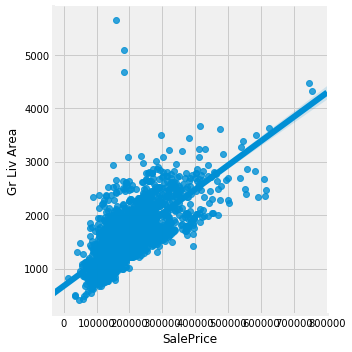

In [13]:
import seaborn
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LinearRegression()
# model.fit(X_train, y_train)
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# print(classification_report(y_test, y_pred))

seaborn.lmplot(x='SalePrice', y='Gr Liv Area', data = df3)

In [14]:
import seaborn


X = df3[ [ 'Overall Qual', 'Lot Area','Year Built']]
y = df3.SalePrice

model = LinearRegression()
# model.fit(X_train, y_train)
model.fit(X, y)


model.predict([[9,50, 2000]])

array([290653.09426031])

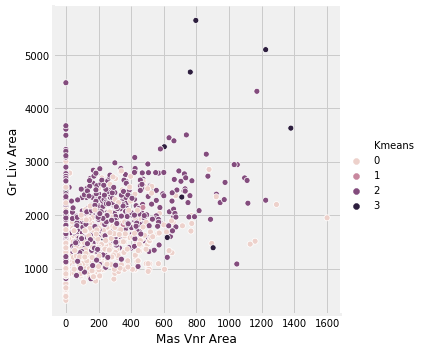

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn

model = KMeans(n_clusters=4)

X = df3[ [ 'Overall Qual', 'Lot Area','Year Built','Year Remod/Add', 'Mas Vnr Area', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Garage Area','Garage Cars', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
         'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Street_Grvl','Street_Pave']]

# X = df3[ [ 'Overall Qual', 'Lot Area','Year Built']]

# Now we do the clustering
model.fit(X)

#plot the clustering figure
df3['Kmeans'] = model.labels_

# r = [i for i in model.labels_ if i!=0]
# print(r)

seaborn.relplot( x='Mas Vnr Area', y ='Gr Liv Area', hue = 'Kmeans', data=df3)

# model.predict([[9,50, 2000]])

In [16]:
for k in range(2, 10):
    model = KMeans(n_clusters = k)
    model.fit(X)
    print('k = ', k, 'silhouette = ', silhouette_score(X, model.labels_, metric = 'euclidean'))

k =  2 silhouette =  0.9656116862594126
k =  3 silhouette =  0.7711009000890819
k =  4 silhouette =  0.45938339502653225
k =  5 silhouette =  0.4637585195782812
k =  6 silhouette =  0.45438283893992465
k =  7 silhouette =  0.45131891434199733
k =  8 silhouette =  0.427055614343235
k =  9 silhouette =  0.4101416996020424


# Use principal component analysis (PCA) to reduce the dimensionality

0.7746180793197285


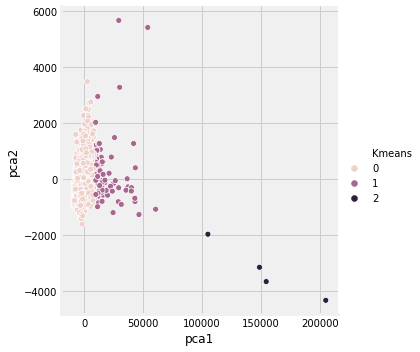

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components =3)
features  = df3[ [ 'Overall Qual', 'Lot Area','Year Built','Year Remod/Add', 'Mas Vnr Area', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Garage Area','Garage Cars', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
         'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Street_Grvl','Street_Pave']]
X2 = pca.fit_transform(features)
df3['pca1'] = X2[:, 0]
df3['pca2'] = X2[:, 1]
df3['pca3'] = X2[:, 2]



model = KMeans(n_clusters = 3)

x = df3[['pca1', 'pca2', 'pca3']]
model.fit(x)

df3['Kmeans'] = model.labels_
print(silhouette_score(x, model.labels_))

seaborn.relplot(x='pca1', y = 'pca2', hue = 'Kmeans', data = df3)

# cross_val_score(LinearSVC(), df3[['pca1', 'pca2']], df3.SalePrice, cv = 5)

In [18]:
# y = df3.SalePrice
# model = LinearSVC()
# model.fit(x,y)


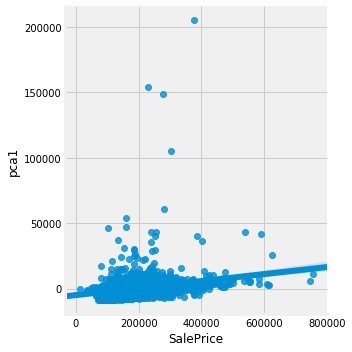

In [19]:
seaborn.lmplot(x='SalePrice', y='pca1', data = df3)

In [20]:
X = df3[['pca1', 'pca2']]
y= df3.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

models = [LinearRegression(), Ridge(), DecisionTreeRegressor(), Lasso(), ElasticNet(), SGDRegressor( max_iter=10)]
# models = [SGDRegressor( max_iter=10)]
for model in models:
    v = ShuffleSplit(n_splits=100, test_size=0.1)
    scores = cross_val_score(model, X_train, y_train, cv = v)
    print('average score:', sum(scores)/len(scores))

average score: 0.5822371533444821
average score: 0.5552864772885308
average score: 0.2677628849477887
average score: 0.5521278466807654
average score: 0.5769888270190634
average score: -1.2612399837294998e+25


In [21]:
from sklearn import ensemble

data = df3.select_dtypes(include=[np.number]).interpolate().dropna()

y = np.log(data.SalePrice)
X = data.drop(['SalePrice', 'PID'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

#lr =  ensemble.RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,max_features = "sqrt", min_samples_leaf = 50)
lr = LinearRegression()
# lr = ensemble.GradientBoostingRegressor()
#lr = linear_model.TheilSenRegressor()
#lr = linear_model.RANSACRegressor(random_state=50)

model = lr.fit(X_train, y_train)
print ("R^2 is: \n", model.score(X_test, y_test))
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))


R^2 is: 
 0.9999999999764838
RMSE is: 
 3.456566430520891e-12


Text(0.5,1,'Linear Regression Model')

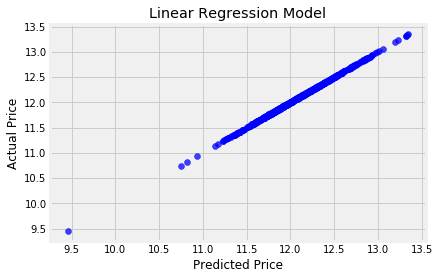

In [22]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
#pltrandom_state=None.show()


## statistic

In [23]:
df3.head()
# df3.SalePrice

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Utilities,Lot Config,...,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Street_Grvl,Street_Pave,Kmeans,pca1,pca2,pca3
0,1,526301100,20,RL,1.0,31770,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,1,1,21524.810868,-295.838327,29.423505
1,2,526350040,20,RH,2.0,11622,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,1,0,1357.433644,-717.970874,-79.771476
2,3,526351010,20,RL,3.0,14267,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,1,0,4020.339195,-107.646304,-28.693545
3,4,526353030,20,RL,4.0,11160,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,0,952.635735,1451.600375,-158.888824
4,5,527105010,60,RL,5.0,13830,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,1,0,3576.961879,-404.649641,388.407423


In [24]:
def predictFeatures(df, price):
    df1 = df.loc[ (df.SalePrice < (df.SalePrice+5000)) & (df.SalePrice > (df.SalePrice-5000)) ]
    lot_area_mean = df1["Lot Area"].mean()
    area_max = df1["Gr Liv Area"].mean()
#     neighbourhood = df1["Neighborhood"].unique()
    return lot_area_mean, area_max, df1.head(10)

In [27]:


price = 100000
x,y, data = predictFeatures(df3, price)

data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Utilities,Lot Config,...,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Street_Grvl,Street_Pave,Kmeans,pca1,pca2,pca3
0,1,526301100,20,RL,1.0,31770,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,1,1,21524.810868,-295.838327,29.423505
1,2,526350040,20,RH,2.0,11622,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,1,0,1357.433644,-717.970874,-79.771476
2,3,526351010,20,RL,3.0,14267,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,1,0,4020.339195,-107.646304,-28.693545
3,4,526353030,20,RL,4.0,11160,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,0,952.635735,1451.600375,-158.888824
4,5,527105010,60,RL,5.0,13830,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,1,0,3576.961879,-404.649641,388.407423
5,6,527105030,60,RL,6.0,9978,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,1,0,-273.791210,-251.569543,251.618915
6,7,527127150,120,RL,7.0,4920,Reg,Lvl,AllPub,Inside,...,0,1,0,0,0,1,0,-5321.218765,298.997385,-203.401543
7,8,527145080,120,RL,8.0,5005,IR1,HLS,AllPub,Inside,...,0,1,0,0,0,1,0,-5238.920347,299.701915,-480.998514
8,9,527146030,120,RL,9.0,5389,IR1,Lvl,AllPub,Inside,...,0,1,0,0,0,1,0,-4840.003913,604.882045,182.107651
9,10,527162130,60,RL,10.0,7500,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,1,0,-2744.132077,247.973272,-182.682696


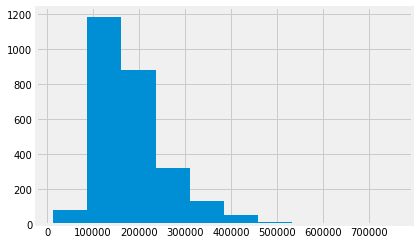

In [28]:
plt.hist(df3.SalePrice)
plt.show()